In [1]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#For data we will use yfinance library
import yfinance as yf

In [2]:
company = 'RELIANCE.NS'
start = dt.datetime(2013,1,1)

In [3]:
data = yf.download(company, start , end=None)

[*********************100%***********************]  1 of 1 completed


In [4]:
print('Total number of days present in the dataset: ',data.shape[0])
print('Total number of fields present in the dataset: ',data.shape[1])

Total number of days present in the dataset:  2640
Total number of fields present in the dataset:  6


In [5]:
data.shape

(2640, 6)

In [6]:
data.describe

<bound method NDFrame.describe of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-01   418.037415   419.325226   415.610443   416.402924   386.519775   
2013-01-02   418.037415   423.981079   417.319244   419.993866   389.853058   
2013-01-03   420.315826   426.952911   418.334595   426.333771   395.737885   
2013-01-04   426.903381   428.240692   422.767578   426.878632   396.243683   
2013-01-07   428.785553   431.410645   421.900787   424.278259   393.829926   
...                 ...          ...          ...          ...          ...   
2023-09-05  2420.000000  2433.949951  2412.449951  2423.600098  2423.600098   
2023-09-06  2421.100098  2436.149902  2417.250000  2428.699951  2428.699951   
2023-09-07  2421.699951  2438.250000  2411.000000  2432.000000  2432.000000   
2023-09-08  2440.000000  2456.000000  2422.949951  2448.199951  2448.199951   
2023-09-11  2452.0

In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,418.037415,419.325226,415.610443,416.402924,386.519775,3152667
2013-01-02,418.037415,423.981079,417.319244,419.993866,389.853058,6203434
2013-01-03,420.315826,426.952911,418.334595,426.333771,395.737885,7968629
2013-01-04,426.903381,428.240692,422.767578,426.878632,396.243683,6140890
2013-01-07,428.785553,431.410645,421.900787,424.278259,393.829926,7064261


In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-05,2420.000000,2433.949951,2412.449951,2423.600098,2423.600098,4337938
2023-09-06,2421.100098,2436.149902,2417.250000,2428.699951,2428.699951,4100185
2023-09-07,2421.699951,2438.250000,2411.000000,2432.000000,2432.000000,6826286
2023-09-08,2440.000000,2456.000000,2422.949951,2448.199951,2448.199951,11554644
2023-09-11,2452.000000,2476.850098,2452.000000,2474.600098,2474.600098,6628445


In [9]:
print('Null Values:',data.isnull().values.sum())
print('NA values:',data.isnull().values.any())

Null Values: 0
NA values: False


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2640 entries, 2013-01-01 to 2023-09-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2640 non-null   float64
 1   High       2640 non-null   float64
 2   Low        2640 non-null   float64
 3   Close      2640 non-null   float64
 4   Adj Close  2640 non-null   float64
 5   Volume     2640 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 144.4 KB


In [11]:
df=data.reset_index()

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,418.037415,419.325226,415.610443,416.402924,386.519775,3152667
1,2013-01-02,418.037415,423.981079,417.319244,419.993866,389.853058,6203434
2,2013-01-03,420.315826,426.952911,418.334595,426.333771,395.737885,7968629
3,2013-01-04,426.903381,428.240692,422.767578,426.878632,396.243683,6140890
4,2013-01-07,428.785553,431.410645,421.900787,424.278259,393.829926,7064261
...,...,...,...,...,...,...,...
2635,2023-09-05,2420.000000,2433.949951,2412.449951,2423.600098,2423.600098,4337938
2636,2023-09-06,2421.100098,2436.149902,2417.250000,2428.699951,2428.699951,4100185
2637,2023-09-07,2421.699951,2438.250000,2411.000000,2432.000000,2432.000000,6826286
2638,2023-09-08,2440.000000,2456.000000,2422.949951,2448.199951,2448.199951,11554644


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2640 non-null   datetime64[ns]
 1   Open       2640 non-null   float64       
 2   High       2640 non-null   float64       
 3   Low        2640 non-null   float64       
 4   Close      2640 non-null   float64       
 5   Adj Close  2640 non-null   float64       
 6   Volume     2640 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 144.5 KB


In [14]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2013-01-01 00:00:00
Ending Date 2023-09-11 00:00:00


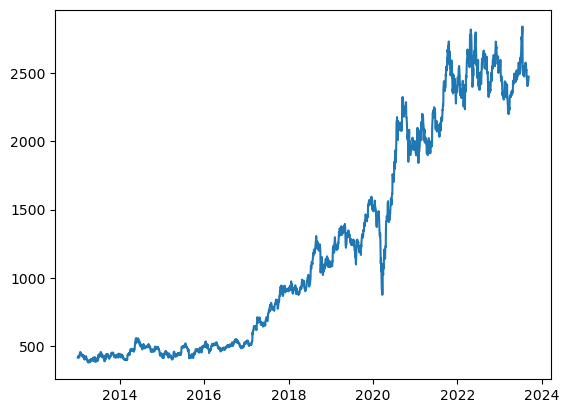

In [15]:
plt.plot(data.Close)

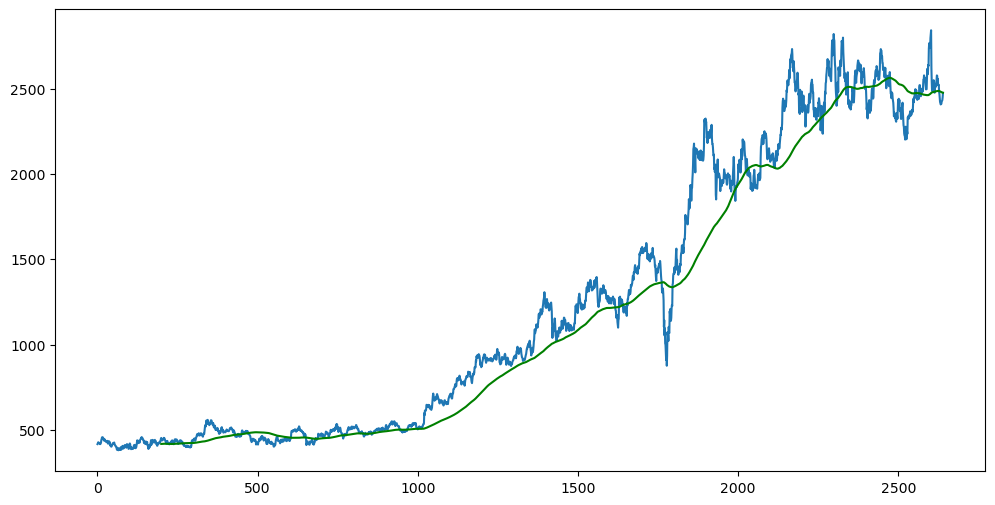

In [16]:
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')

In [17]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2640, 2)


In [18]:
closedf = closedf[closedf['Date'] > '2018-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1407


In [19]:
closedf

,Date,Close
1233,2018-01-02,902.594299
1234,2018-01-03,906.210022
1235,2018-01-04,911.658386
1236,2018-01-05,914.580688
1237,2018-01-08,919.830933
...,...,...
2635,2023-09-05,2423.600098
2636,2023-09-06,2428.699951
2637,2023-09-07,2432.000000
2638,2023-09-08,2448.199951


In [20]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period for predicting close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [21]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1407, 1)


In [22]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (844, 1)
test_data:  (563, 1)


In [23]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (828, 15)
y_train:  (828,)
X_test:  (547, 15)
y_test (547,)


In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (828, 15, 1)
X_test:  (547, 15, 1)


In [26]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [27]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
26/26 [==============================] - 4s 37ms/step - loss: 0.1422 - val_loss: 0.6949
Epoch 2/200
26/26 [==============================] - 0s 14ms/step - loss: 0.1103 - val_loss: 0.5717
Epoch 3/200
26/26 [==============================] - 0s 15ms/step - loss: 0.0721 - val_loss: 0.3582
Epoch 4/200
26/26 [==============================] - 0s 16ms/step - loss: 0.0236 - val_loss: 0.0350
Epoch 5/200
26/26 [==============================] - 0s 16ms/step - loss: 0.0031 - val_loss: 0.0255
Epoch 6/200
26/26 [==============================] - 1s 20ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 7/200
26/26 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 8/200
26/26 [==============================] - 1s 20ms/step - loss: 9.9757e-04 - val_loss: 0.0021
Epoch 9/200
26/26 [==============================] - 0s 15ms/step - loss: 9.4312e-04 - val_loss: 0.0014
Epoch 10/200
26/26 [==============================] - 0s 15ms/step - loss: 9.1439e-04 - val_

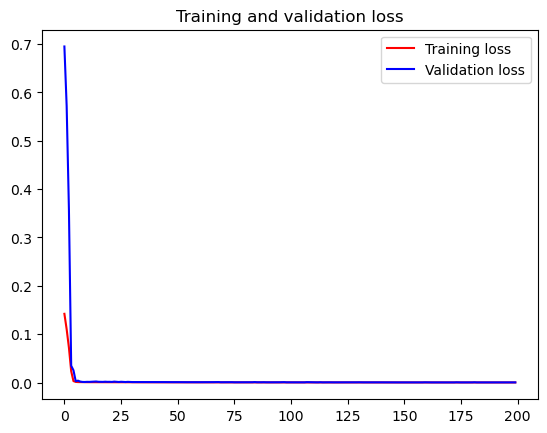

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

18/18 [==============================] - 0s 5ms/step


((828, 1), (547, 1))

In [30]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [31]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  32.36301768539949
Train data MSE:  1047.3649137054801
Train data MAE:  22.937126049097035
-------------------------------------------------------------------------------------
Test data RMSE:  42.16916736573753
Test data MSE:  1778.2386763195832
Test data MAE:  31.93986798553188


In [32]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9938171850443531
Test data explained variance regression score: 0.9379472738637672


In [33]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9937621162160217
Test data R2 score: 0.9273646279436963


In [34]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.000523290800511448
Test data MGD:  0.0002886370223360108
----------------------------------------------------------------------
Train data MPD:  0.7114679829962564
Test data MPD:  0.7151152218365616


In [43]:
model.save("E://Stock price prediction/stock_prediction_model.h5")

In [35]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1407, 1)
Test predicted data:  (1407, 1)


In [36]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [37]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [38]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [39]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()